In this notebook, I will be cleaning the Olympics 2024 dataset obtained from Kaggle.

[Olympic Medal vs GDP](https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp)

# Load the dataset

In [13]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
olympic_data = pd.read_csv('/content/olympics.csv')
olympic_data.head()

,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2


# Check the general information about the dataset

Next, checked the general information of the dataset to know the data type of each column, how many columns and entries there are.

In [3]:
# checking the general information about the dataset
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   region        90 non-null     object 
 3   gold          90 non-null     int64  
 4   silver        90 non-null     int64  
 5   bronze        90 non-null     int64  
 6   total         90 non-null     int64  
 7   gdp           90 non-null     float64
 8   gdp_year      90 non-null     int64  
 9   population    90 non-null     float64
dtypes: float64(2), int64(5), object(3)
memory usage: 7.2+ KB


There are:

90 entries / rows

10 columns

3 categorical columns and 7 numerical columns

In [4]:
# check for any missing values
olympic_data.isnull().sum()

,0
country,0
country_code,0
region,0
gold,0
silver,0
bronze,0
total,0
gdp,0
gdp_year,0
population,0


In [5]:
# check for duplicate values
olympic_data.duplicated().sum()


0

In [6]:
olympic_data[['country', 'country_code']].head()

,country,country_code
0,United States,USA
1,China,CHN
2,Japan,JPN
3,Australia,AUS
4,France,FRA


The **country_code** column is just an abbreviated name for the **country** hence they are similar.

In [7]:
olympic_data['region'].unique()

array(['North America', 'Asia', 'Oceania', 'Europe', 'Africa',
       'South America', 'Caribbean'], dtype=object)

These are 7 regions that participated in the Olympics 2024

# Cleaning the dataset

The dataset does not require too much cleaning, just encoding of the **"country_code"** and **"region"** column and the dropping of the **"country"** column.

In [8]:
# dropping the country column
olympic_data.drop('country', axis=1, inplace=True)
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  90 non-null     object 
 1   region        90 non-null     object 
 2   gold          90 non-null     int64  
 3   silver        90 non-null     int64  
 4   bronze        90 non-null     int64  
 5   total         90 non-null     int64  
 6   gdp           90 non-null     float64
 7   gdp_year      90 non-null     int64  
 8   population    90 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 6.5+ KB


In [10]:
# encode the 'country_code' and 'region' columns
# i will use OneHotEncoding for the 'region' column
# LabelEncoding for the 'country_code' column

olympic_data = pd.get_dummies(olympic_data, columns=['region'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
olympic_data['country_code'] = le.fit_transform(olympic_data['country_code'])

In [11]:
# convert the dummies into numeraical dtype (0,1)
dummy_columns = [col for col in olympic_data.columns if 'region_' in col]
olympic_data[dummy_columns] = olympic_data[dummy_columns].astype(int)


## Check for outliers


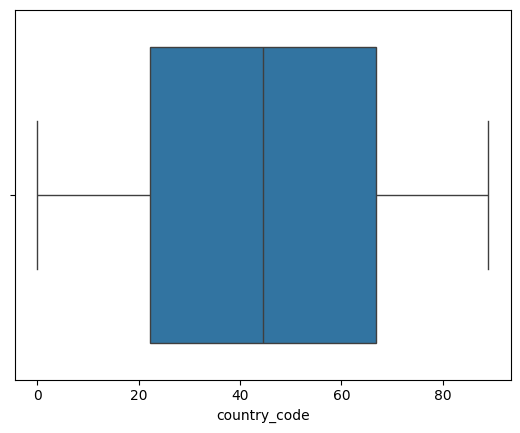

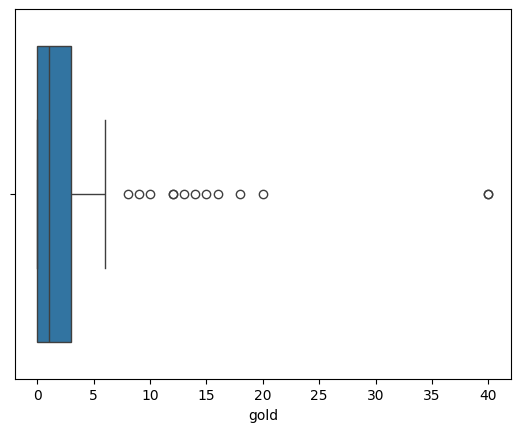

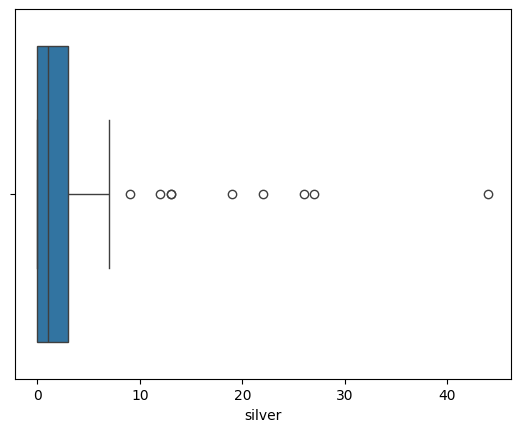

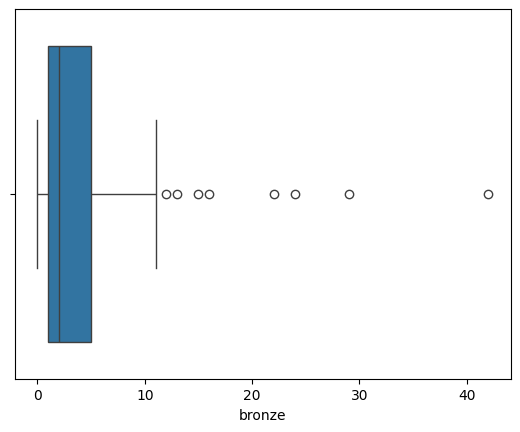

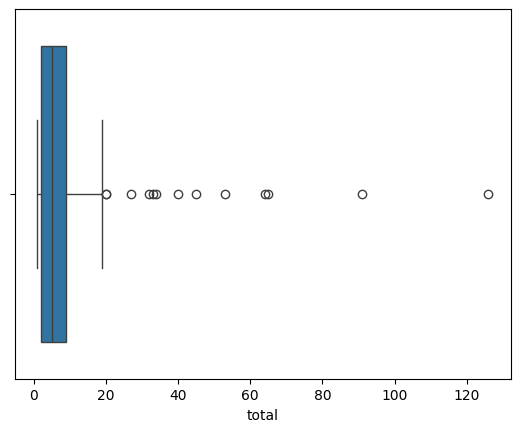

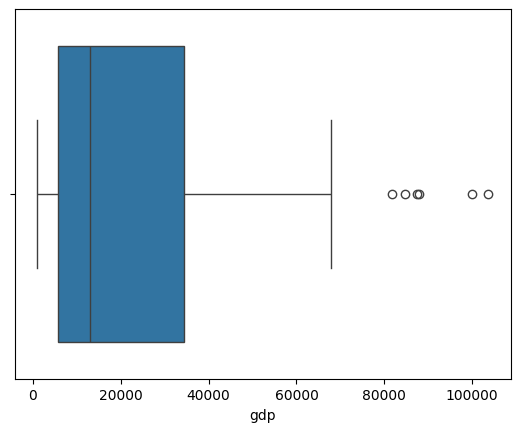

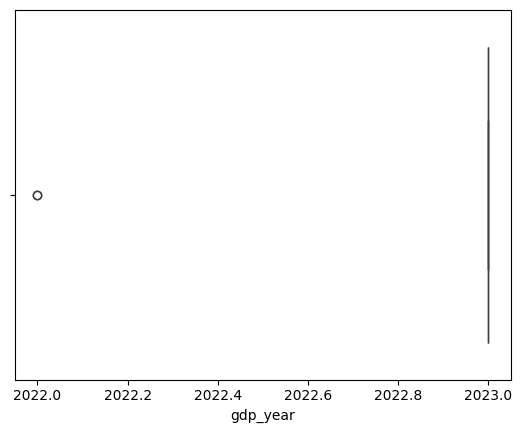

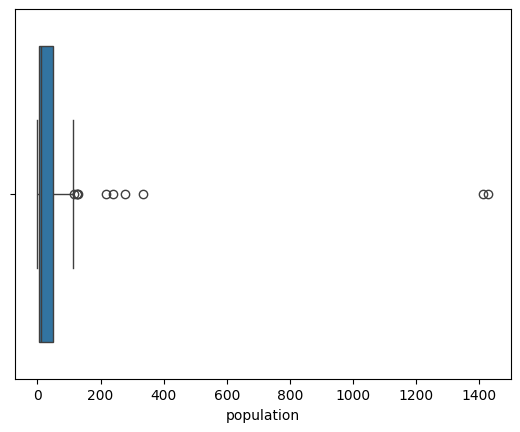

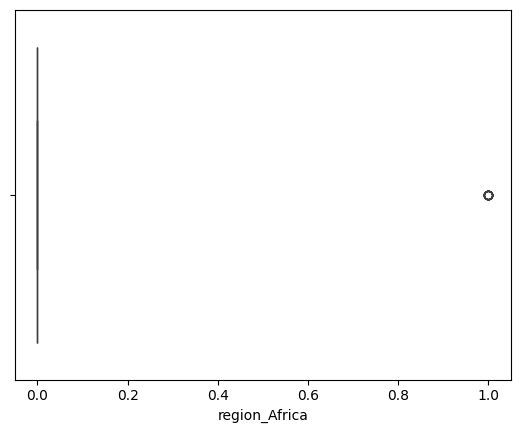

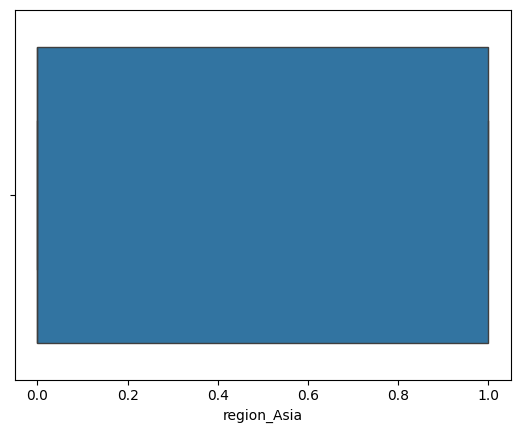

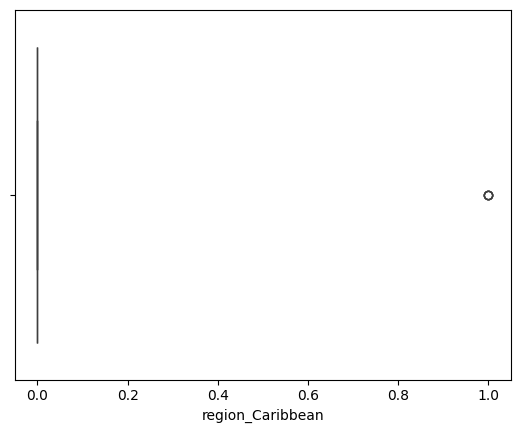

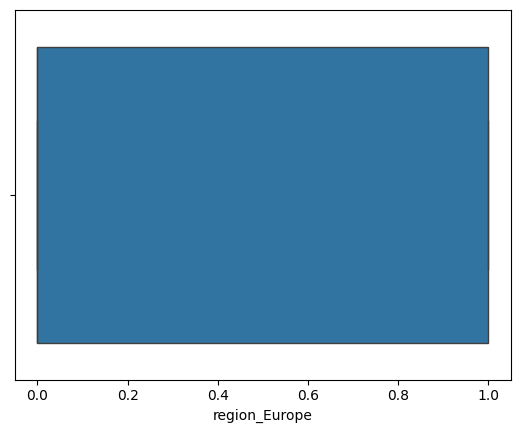

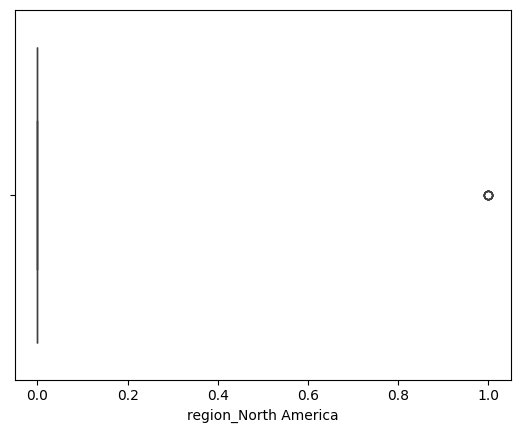

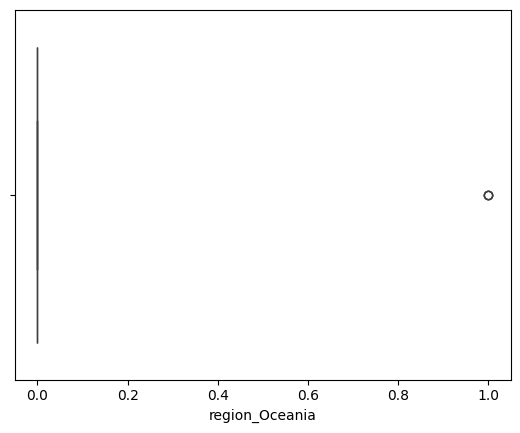

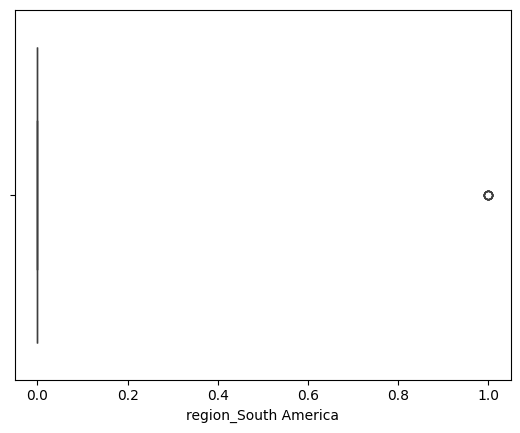

In [19]:
# display the outliers in boxplots
for col in olympic_data:
  sns.boxplot(x=olympic_data[col])
  plt.show()

In [21]:
# counting the outliers using IQR method
Q1 = olympic_data.quantile(0.25)
Q3 = olympic_data.quantile(0.75)

#interquatile range
IQR = Q3 - Q1

#define the bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = ((olympic_data < lower) | (olympic_data > upper)).sum()

In [22]:
outliers

,0
country_code,0
gold,13
silver,9
bronze,8
total,13
gdp,6
gdp_year,2
population,10
region_Africa,12
region_Asia,0


**Medal Counts:** These outliers are relevant because they represent natural differences in performance levels. Removing them would obscure insights into high-performing countries.

**GDP and Population:** Outliers in gdp and population are also relevant because they reflect genuine economic and demographic variations. These outliers are essential to understanding relationships between economic factors and Olympic performance.

**Regions:** Outliers within regional dummy columns may indicate specific trends within certain regions.

# Save to new CSV file

In [23]:
# save the clean dataset
olympic_data.to_csv('clean_olympic_data.csv', index=False)